In [25]:
#导入相关库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10,5))
plt.rc('font',size=12)
pd.options.display.max_rows = 10
from datetime import datetime
from pandas import Series,DataFrame
%matplotlib inline

In [4]:
#load dataset
df = pd.read_csv('Clients2.csv')
df.head()

,Number,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,date,entity_type,entity_year_established,payment__code
0,1,20175,927,1,1527012511,66.66,PAYMENT,2018/5/23,Other Partnership,2006,0
1,2,8485,927,1,1511716095,66.66,PAYMENT,2017/11/27,Other Partnership,2006,0
2,3,13778,927,1,1519319303,66.66,PAYMENT,2018/2/23,Other Partnership,2006,0
3,4,22768,927,1,1529863724,66.66,PAYMENT,2018/6/25,Other Partnership,2006,0
4,5,15698,927,1,1521738504,66.66,PAYMENT,2018/3/23,Other Partnership,2006,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25559 entries, 0 to 25558
Data columns (total 11 columns):
Number                     25559 non-null int64
transaction_id             25559 non-null int64
contract_id                25559 non-null int64
client_id                  25559 non-null int64
transaction_date           25559 non-null int64
payment_amt                25559 non-null float64
payment_code               25559 non-null object
date                       25559 non-null object
entity_type                25559 non-null object
entity_year_established    25559 non-null int64
payment__code              25559 non-null int64
dtypes: float64(1), int64(7), object(3)
memory usage: 2.1+ MB


In [6]:
##Data is clean without missing value.

In [7]:
grouped=df["Number"].groupby(df["payment_code"]).count()
grouped

payment_code
DEFAULT     2219
PAYMENT    23340
Name: Number, dtype: int64

In [8]:
df.describe()

,Number,transaction_id,contract_id,client_id,transaction_date,payment_amt,entity_year_established,payment__code
count,25559.000000,25559.000000,25559.000000,25559.000000,2.555900e+04,25559.000000,25559.000000,25559.000000
mean,12780.000000,12780.000000,758.221409,602.886811,1.517126e+09,1221.455691,2009.160335,0.086819
std,7378.392101,7378.392101,352.190207,344.782295,9.964331e+06,4346.049363,5.623413,0.281575
min,1.000000,1.000000,1.000000,1.000000,1.499019e+09,-136.660000,1999.000000,0.000000
25%,6390.500000,6390.500000,510.000000,308.000000,1.508433e+09,93.330000,2005.000000,0.000000
50%,12780.000000,12780.000000,732.000000,593.000000,1.518110e+09,266.660000,2011.000000,0.000000
75%,19169.500000,19169.500000,991.000000,894.000000,1.525976e+09,833.330000,2014.000000,0.000000
max,25559.000000,25559.000000,1643.000000,1281.000000,1.532456e+09,200000.050000,2018.000000,1.000000


In [68]:
df41=df.loc[df['payment_code']=='DEFAULT']
df42=df.loc[df['payment_code']=='PAYMENT']
df41

,Number,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,date,entity_type,entity_year_established,payment__code
98,99,15231,836,7,1521392903,50.00,DEFAULT,2018/3/19,Australian Private Company,2015,1
100,101,14979,836,7,1520960902,66.66,DEFAULT,2018/3/14,Australian Private Company,2015,1
102,103,14162,836,7,1519837702,66.66,DEFAULT,2018/3/1,Australian Private Company,2015,1
109,110,15232,836,7,1521392903,100.00,DEFAULT,2018/3/19,Australian Private Company,2015,1
110,111,14161,836,7,1519837702,416.67,DEFAULT,2018/3/1,Australian Private Company,2015,1
...,...,...,...,...,...,...,...,...,...,...,...
25426,25427,23542,1422,1252,1530641325,4166.67,DEFAULT,2018/7/4,Australian Private Company,2014,1
25434,25435,24707,1462,1254,1531764560,400.00,DEFAULT,2018/7/17,Australian Private Company,2011,1
25437,25438,24706,1462,1254,1531764559,2500.00,DEFAULT,2018/7/17,Australian Private Company,2011,1
25439,25440,25498,1462,1254,1532455688,400.00,DEFAULT,2018/7/25,Australian Private Company,2011,1


In [82]:
df1=df
cut_bins=[1999,2002,2006,2010,2014,2018]
age_cut=pd.cut(df1["entity_year_established"],cut_bins)
age_cut_grouped=df1["payment__code"].groupby(age_cut).count()
age_cut_grouped1=df1["payment__code"].groupby(age_cut).sum()
df2=pd.merge(pd.DataFrame(age_cut_grouped), pd.DataFrame(age_cut_grouped1),right_index=True,left_index=True)
df2.rename(columns={"payment__code_x":"PAYMENT","payment__code_y":"DEFAULT"},inplace=True)
df2.insert(2,"DEFAULT rate",df2["DEFAULT"]/df2["PAYMENT"])
df2

,PAYMENT,DEFAULT,DEFAULT rate
entity_year_established,,,
"(1999, 2002]",4228,279,0.065989
"(2002, 2006]",3199,163,0.050953
"(2006, 2010]",4535,413,0.091069
"(2010, 2014]",7828,783,0.100026
"(2014, 2018]",5135,536,0.104382


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]), <a list of 10 Text yticklabel objects>)

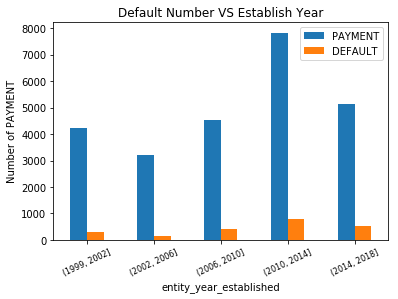

In [83]:
ax1=df2[["PAYMENT","DEFAULT"]].plot.bar()
ax1.set_xticklabels(df2.index,rotation=25)
ax1.set_ylabel("Number of PAYMENT")
ax1.set_title("Default Number VS Establish Year")
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)

(array([0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11]),
 <a list of 8 Text yticklabel objects>)

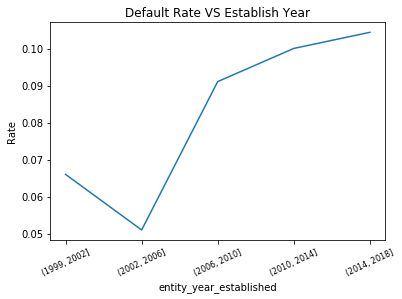

In [87]:
ax11=df2["DEFAULT rate"].plot()
ax11.set_xticks([0,1,2,3,4])
ax11.set_xticklabels(df2.index,rotation=25)
ax11.set_ylabel("Rate")
ax11.set_title("Default Rate VS Establish Year")
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)

In [85]:
cut_bins=[1999,2002,2006,2010,2014,2018]
age_cut2=pd.cut(df41["entity_year_established"],cut_bins)
age_cut_grouped2=df41["payment_amt"].groupby(age_cut2).count()
age_cut_grouped21=df41["payment_amt"].groupby(age_cut2).sum()
df7=pd.merge(pd.DataFrame(age_cut_grouped2), pd.DataFrame(age_cut_grouped21),right_index=True,left_index=True)
df7.rename(columns={"payment_amt_x":"Default Number","payment_amt_y":"Default Money"},inplace=True)

age_cut3=pd.cut(df["entity_year_established"],cut_bins)
age_cut_grouped3=df["payment_amt"].groupby(age_cut3).count()
age_cut_grouped31=df["payment_amt"].groupby(age_cut3).sum()
df71=pd.merge(pd.DataFrame(age_cut_grouped3), pd.DataFrame(age_cut_grouped31),right_index=True,left_index=True)
df71.rename(columns={"payment_amt_x":"Payment Number","payment_amt_y":"Payment Money"},inplace=True)

df72=pd.merge(pd.DataFrame(df7), pd.DataFrame(df71),right_index=True,left_index=True)
df72.insert(4,"DEFAULT ratio",df72["Default Money"]/df72["Payment Money"])
df72

,Default Number,Default Money,Payment Number,Payment Money,DEFAULT ratio
entity_year_established,,,,,
"(1999, 2002]",279,228801.11,4228,6065026.60,0.037725
"(2002, 2006]",163,225179.65,3199,4630598.77,0.048629
"(2006, 2010]",413,245704.66,4535,5070636.31,0.048456
"(2010, 2014]",783,445716.73,7828,8704429.21,0.051206
"(2014, 2018]",536,328504.93,5135,5998845.98,0.054761


(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.]),
 <a list of 6 Text yticklabel objects>)

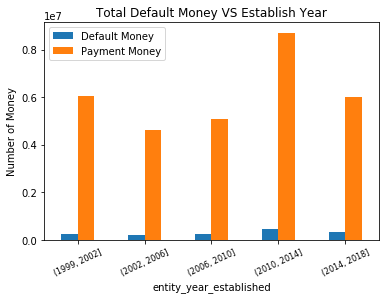

In [91]:
ax12=df72[["Default Money","Payment Money"]].plot.bar()
ax12.set_xticklabels(df72.index,rotation=25)
ax12.set_ylabel("Number of Money")
ax12.set_title("Total Default Money VS Establish Year")
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)

(array([0.035 , 0.0375, 0.04  , 0.0425, 0.045 , 0.0475, 0.05  , 0.0525,
        0.055 , 0.0575]), <a list of 10 Text yticklabel objects>)

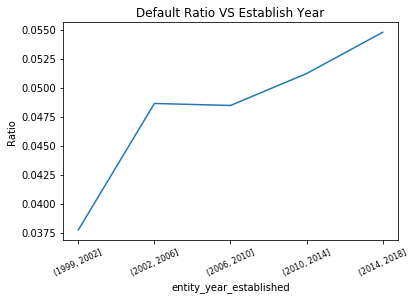

In [93]:
ax13=df72["DEFAULT ratio"].plot()
ax13.set_xticks([0,1,2,3,4])
ax13.set_xticklabels(df72.index,rotation=25)
ax13.set_ylabel("Ratio")
ax13.set_title("Default Ratio VS Establish Year")
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)

In [ ]:
# The analysis between entity_type and Default

In [115]:
entity_type_class=df.groupby('entity_type').sum()
entity_type_class1=df.groupby('entity_type').count()
entity_type_class2=df41.groupby('entity_type').sum()
df3=pd.merge(pd.DataFrame(entity_type_class['payment__code']), pd.DataFrame(entity_type_class1['Number']),right_index=True,left_index=True)
df3=pd.merge(df3, pd.DataFrame(entity_type_class['payment_amt']),right_index=True,left_index=True)
df3=pd.merge(df3, pd.DataFrame(entity_type_class2['payment_amt']),right_index=True,left_index=True)
df3.rename(columns={"payment__code":"DEFAULT","Number":"Total Payment tried","payment_amt_x":"Total Payment","payment_amt_y":"Total DEFAULT"},inplace=True)
df3.insert(4,"DEFAULT rate",df3["DEFAULT"]/df3["Total Payment tried"])
df3.insert(5,"DEFAULT ratio",df3["Total DEFAULT"]/df3["Total Payment"])
df3

,DEFAULT,Total Payment tried,Total Payment,Total DEFAULT,DEFAULT rate,DEFAULT ratio
entity_type,,,,,,
Australian Private Company,1217,14827,22368301.54,956493.07,0.082080,0.042761
Australian Public Company,16,128,118287.48,7770.82,0.125000,0.065694
Discretionary Investment Trust,23,124,349654.80,113763.57,0.185484,0.325360
Discretionary Trading Trust,21,187,364187.56,18431.11,0.112299,0.050609
Family Partnership,33,736,678141.51,11268.34,0.044837,0.016617
Hybrid Trust,2,32,21374.96,900.00,0.062500,0.042105
Individual/Sole Trader,901,9354,7053294.61,385726.14,0.096322,0.054687
Other Partnership,6,135,78578.32,2525.93,0.044444,0.032145


In [14]:
#ax2=df3[["DEFAULT"]].plot.bar()
#ax1.set_xticklabels(df3.index,rotation=15)
#ax1.set_ylabel("Total Payment tried")
#ax1.set_title("Defualt Number VS Establish Year")

In [15]:
#plt.figure(figsize=(6,9))
#fig = plt.figure()
#plt.pie(df3["DEFAULT"],labels=df3.index,autopct='%1.2f%%') 
#plt.title("Pie chart")
#plt.show()  

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 <a list of 8 Text yticklabel objects>)

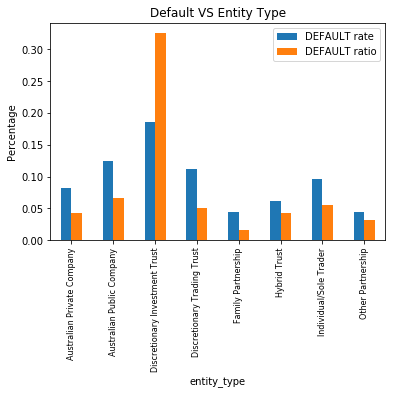

In [118]:
ax22=df3[["DEFAULT rate","DEFAULT ratio"]].plot.bar()
ax22.set_xticklabels(df3.index,rotation=90)
ax22.set_ylabel("Percentage")
ax22.set_title("Default VS Entity Type")
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)

In [ ]:
# The analysis between payment_amt and Default

In [143]:
cut_bins=[0,5000,10000,15000,20000,25000,30000,35000,40000,45000,200000]
payment_amt_cut=pd.cut(df41['payment_amt'],cut_bins)
payment_amt_cut_grouped=df41['payment_amt'].groupby(payment_amt_cut).count()
payment_amt_cut_grouped1=df41['payment_amt'].groupby(payment_amt_cut).sum()
df5=pd.merge(pd.DataFrame(payment_amt_cut_grouped), pd.DataFrame(payment_amt_cut_grouped1),right_index=True,left_index=True)
df5.rename(columns={"payment_amt_x":"DEFAULT","payment_amt_y":"DEFAULT Money"},inplace=True)
#df5

In [148]:
cut_bins=[0,5000,10000,15000,20000,25000,30000,35000,40000,45000,200001]
payment_amt_cut1=pd.cut(df['payment_amt'],cut_bins)
payment_amt_cut_grouped1=df['payment_amt'].groupby(payment_amt_cut1).count()
payment_amt_cut_grouped2=df['payment_amt'].groupby(payment_amt_cut1).sum()
df8=pd.merge(pd.DataFrame(payment_amt_cut_grouped1), pd.DataFrame(payment_amt_cut_grouped2),right_index=True,left_index=True)
df8.rename(columns={"payment_amt_x":"Payment","payment_amt_y":"Payment Money"},inplace=True)
#df8
df51=pd.merge(df5, df8,right_index=True,left_index=True)
df51.insert(4,"DEFAULT ratio",df51["DEFAULT Money"]/df51["Payment Money"])
df51

,DEFAULT,DEFAULT Money,Payment,Payment Money,DEFAULT ratio
payment_amt,,,,,
"(0, 5000]",2196,1094882.99,24480,1.313063e+07,0.083384
"(5000, 10000]",6,44016.74,327,2.038711e+06,0.021590
"(10000, 15000]",4,54372.98,248,2.690455e+06,0.020210
"(15000, 20000]",11,213606.27,71,1.201862e+06,0.177729
"(20000, 25000]",0,0.00,238,4.936086e+06,0.000000
"(25000, 30000]",0,0.00,21,5.455191e+05,0.000000
"(30000, 35000]",0,0.00,98,2.947600e+06,0.000000
"(35000, 40000]",1,40000.00,8,3.008692e+05,0.132948
"(40000, 45000]",0,0.00,32,1.281599e+06,0.000000


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text yticklabel objects>)

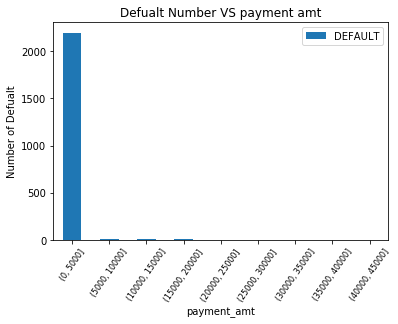

In [145]:
ax31=df51[["DEFAULT"]].plot.bar()
ax31.set_xticklabels(df51.index,rotation=55)
ax31.set_ylabel("Number of Defualt")
ax31.set_title("Defualt Number VS payment amt")
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000.]), <a list of 7 Text yticklabel objects>)

<Figure size 1440x720 with 0 Axes>

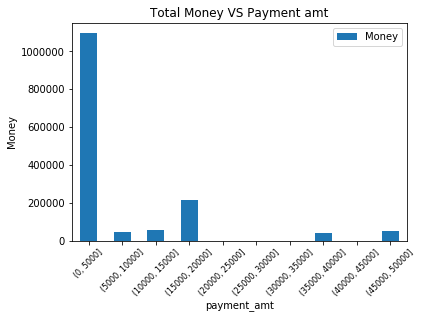

In [27]:
plt.figure(figsize=(20,10))
ax32=df5[["Money"]].plot.bar()
ax32.set_xticklabels(df5.index,rotation=45)
ax32.set_ylabel("Money")
ax32.set_title("Total Money VS Payment amt")
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)

(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ]),
 <a list of 9 Text yticklabel objects>)

<Figure size 1440x720 with 0 Axes>

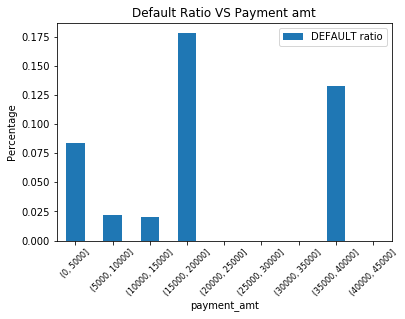

In [149]:
plt.figure(figsize=(20,10))
ax33=df51[["DEFAULT ratio"]].plot.bar()
ax33.set_xticklabels(df51.index,rotation=45)
ax33.set_ylabel("Percentage")
ax33.set_title("Default Ratio VS Payment amt")
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)

In [28]:
#plt.figure(1)
#plt.subplot(221)
#ax33=df5["DEFAULT"].plot.bar()
#plt.subplot(222)
#ax33=df5["Money"].plot.bar()
#plt.show()
#fig.subplots_adjust(wspace=10, hspace=1)

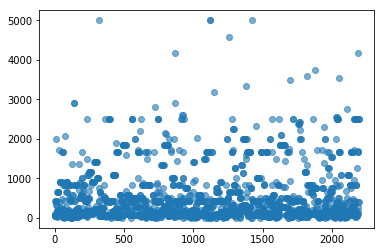

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [47]:
df6=df4.query("payment_amt < =5000")
np=range(0,2196)
plt.scatter(np, df6['payment_amt'], alpha=0.6)  # transparence 0.6
plt.show()
plt.figure(figsize=(20,10))

In [122]:
df7=df6.query("payment_amt < =1000")
df7.describe()

,Number,transaction_id,contract_id,client_id,transaction_date,payment_amt,entity_year_established,payment__code
count,1891.000000,1891.000000,1891.000000,1891.000000,1.891000e+03,1891.000000,1891.000000,1891.0
mean,12350.795346,12420.088313,647.652565,582.127446,1.516674e+09,277.025865,2010.222105,1.0
std,6990.006278,7419.159897,317.927399,324.844437,1.009432e+07,253.919548,5.322047,0.0
min,99.000000,143.000000,1.000000,7.000000,1.499105e+09,0.010000,1999.000000,1.0
25%,6007.500000,5557.500000,408.000000,289.000000,1.507223e+09,75.000000,2007.000000,1.0
50%,12239.000000,12733.000000,649.000000,571.000000,1.518110e+09,166.670000,2012.000000,1.0
75%,17995.000000,18432.500000,852.000000,840.500000,1.525198e+09,416.670000,2014.000000,1.0
max,25440.000000,25557.000000,1604.000000,1254.000000,1.532456e+09,1000.000000,2018.000000,1.0
